In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import sys

import numpy as np
import pandas as pd

sys.path.insert(0, '..')
import ccal

In [3]:
dir(ccal)

['GPSMap',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'apply_function_on_2_1d_arrays_and_compute_empirical_p_value',
 'apply_function_on_2_2d_arrays_slices',
 'assign_colors',
 'cast_series_to_builtins',
 'cast_str_to_builtins',
 'clean_git_url',
 'clean_name',
 'clean_path',
 'cluster',
 'cluster_2d_array_rows',
 'cluster_2d_array_slices_by_group',
 'compute_1d_array_cumulative_sum',
 'compute_brier_entropy',
 'compute_empirical_p_value',
 'compute_empirical_p_values_and_fdrs',
 'compute_entropy',
 'compute_gene_scores',
 'compute_information_coefficient',
 'compute_information_distance',
 'compute_log_ratios',
 'compute_margin_of_error',
 'conda_is_installed',
 'copy_path',
 'count_coclustering_and_normalize',
 'create_gitkeep',
 'decorate_ax',
 'define_exponential_function',
 'download',
 'drop_df_slices',
 'drop_nan_and_apply_function_on_2_1d_arrays',
 'dump_gpsmap',
 'echo_or_print',
 'establish_p

Computing column-x-column distance with <function compute_information_distance at 0x11495bd90> ...
HCC with K=4 ...
	(K=4) 30/30 - done.


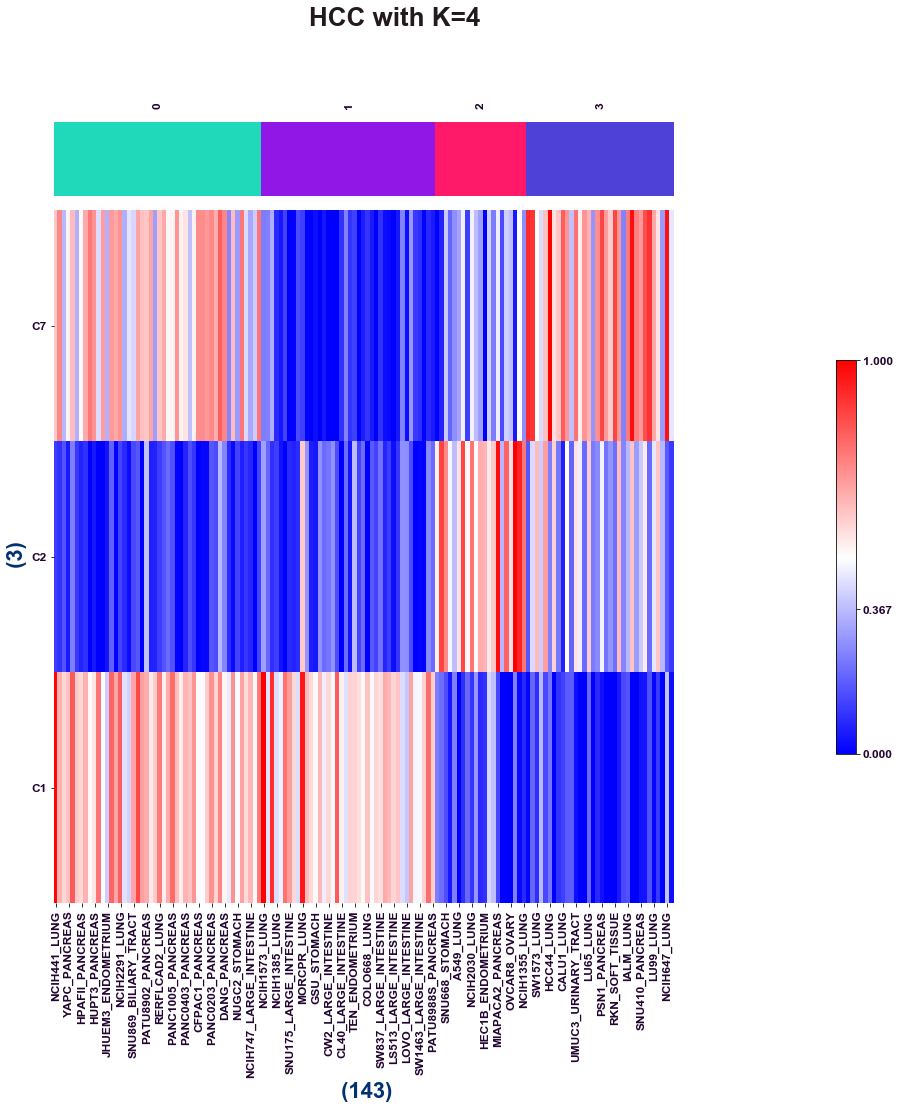

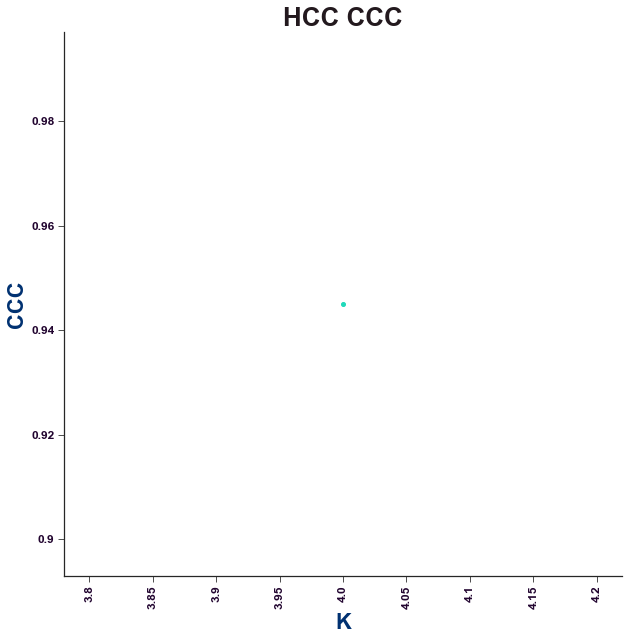

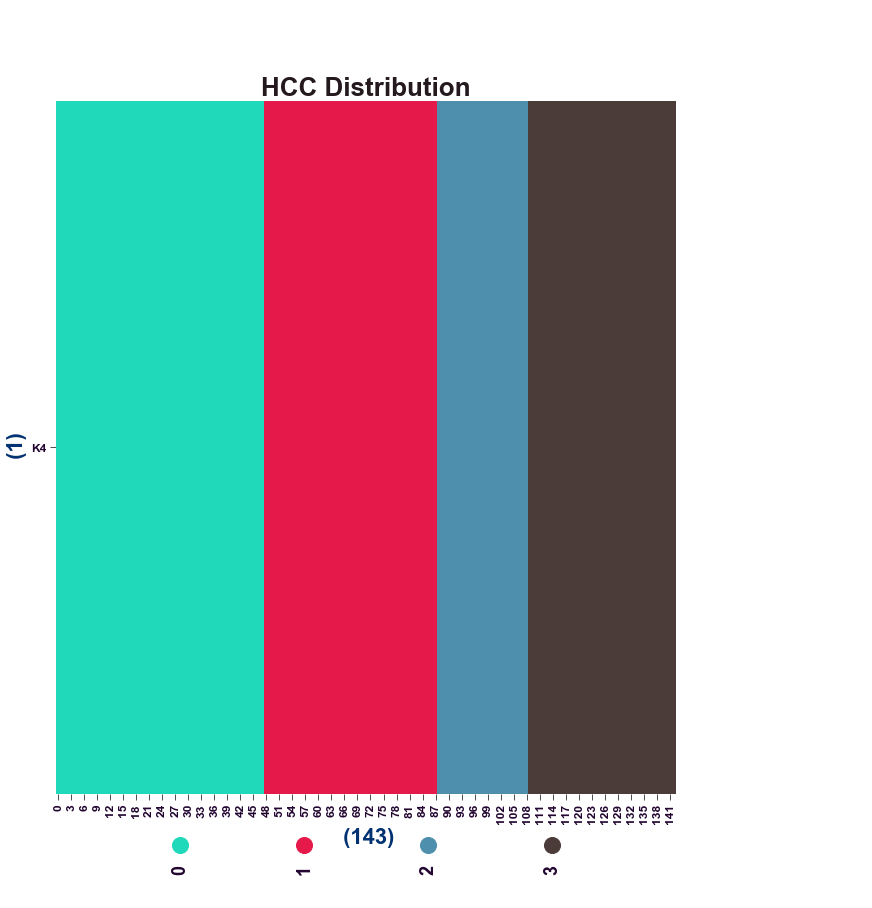

In [4]:
h = pd.read_table(
    'ccle_solid_cancers_kras_mutant/h_matrix__k_x_sample.tsv',
    sep='\t',
    index_col=0).loc[[
        'C7',
        'C2',
        'C1',
    ]]

# normalized_h = pd.DataFrame(
#     ccal.normalize_2d_array(
#         ccal.normalize_2d_array(h.values, '-0-', axis=1).clip(-3, 3),
#         '0-1',
#         axis=1),
#     index=h.index,
#     columns=h.columns)

normalized_h = h

distance__column_x_column, k_hcc_distance_linkage, k_hcc_distance_linkage_ccc, hcc__k_x_column = ccal.explore_states(
    normalized_h, (4, ), distance_function=ccal.compute_information_distance)

In [5]:
sample_states = hcc__k_x_column.loc['K4']

/Users/k/Jumis/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kernel_density.py:161: RuntimeWarning: invalid value encountered in log
  L += func(f_i)


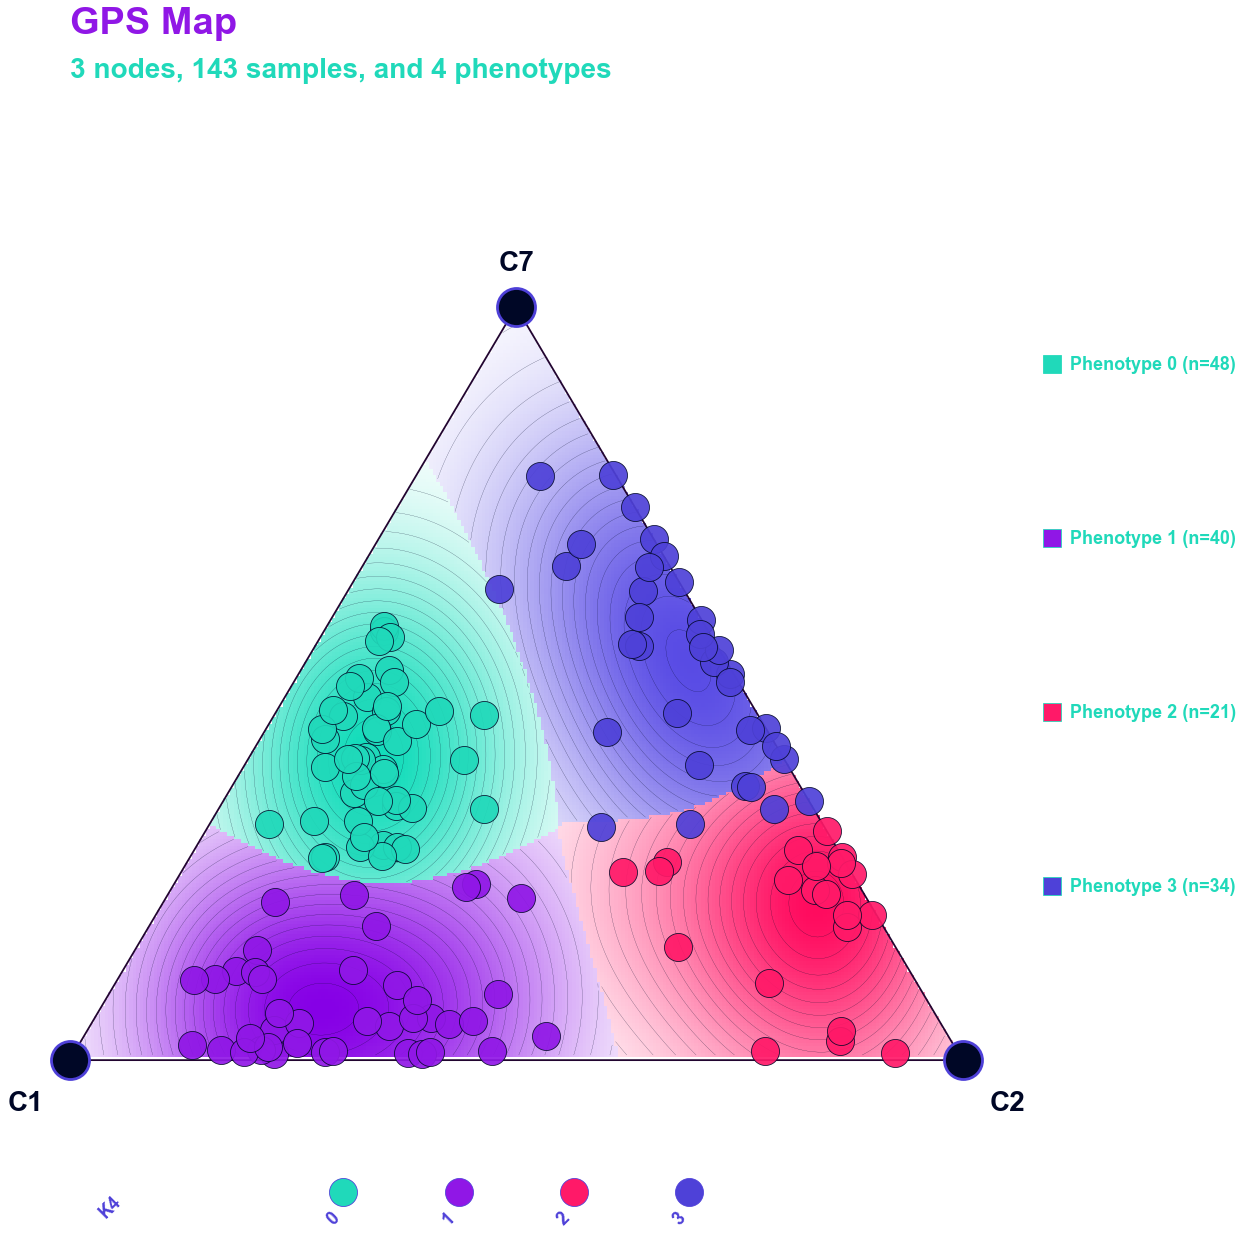

In [6]:
gps_map = ccal.GPSMap(
    normalized_h,
    pull_power=1.2,
    node_x_dimension=pd.DataFrame(
        [
            (
                0.5,
                np.sqrt(3) / 2, ),
            (
                1,
                0, ),
            (
                0,
                0, ),
        ], index=h.index))

gps_map.set_sample_phenotypes(sample_states, bandwidth_factor=2.8)

gps_map.plot_samples_with_phenotype()